In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8")


In [2]:
file_path = r"C:\Users\SULTANUS SALEHIN\Downloads\vital_signs_export.xlsx"

# Load the sheet
df = pd.read_excel(file_path, sheet_name="vital_signs")

# Convert timestamps
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by time
df = df.sort_values('timestamp').reset_index(drop=True)

df.head()


,docId,timestamp,tempC,spo2,motion,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,ecg
0,gpPsQOPLtsqygFc50v4y,2025-11-19 18:04:27.069000+00:00,34.05,NaN,0.021,0.224,0.921,0.108,-5.641,-19.008,15.733,-92
1,pEbRgkNm8HraNYNVmTBf,2025-11-19 18:04:31.534000+00:00,34.07,NaN,0.021,-0.144,0.965,-0.053,-5.771,-2.298,4.656,202
2,iFANUPnZKQxsIYgeTZFt,2025-11-19 18:04:36.733000+00:00,34.10,100.0,0.018,-0.135,0.975,-0.067,-7.641,-0.076,3.298,"-73,-207,-225,-269,-245,-239,-195,-227,-245,-2..."
3,1orosKc97R4esUaoGTWO,2025-11-19 18:04:41.732000+00:00,34.12,100.0,0.016,-0.137,0.980,-0.031,-4.282,0.550,-2.450,"-141,-133,-171,-204,-185,-201,-231,-226,-243,-..."
4,gBJoaXvSmd9AYVEagIZF,2025-11-19 18:04:46.692000+00:00,34.13,100.0,0.016,-0.097,0.980,-0.066,0.710,0.466,0.626,"-175,-183,-214,-219,-223,-228,-229,-240,-223,-..."


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_20676\2018593407.py:25: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\SULTANUS SALEHIN\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


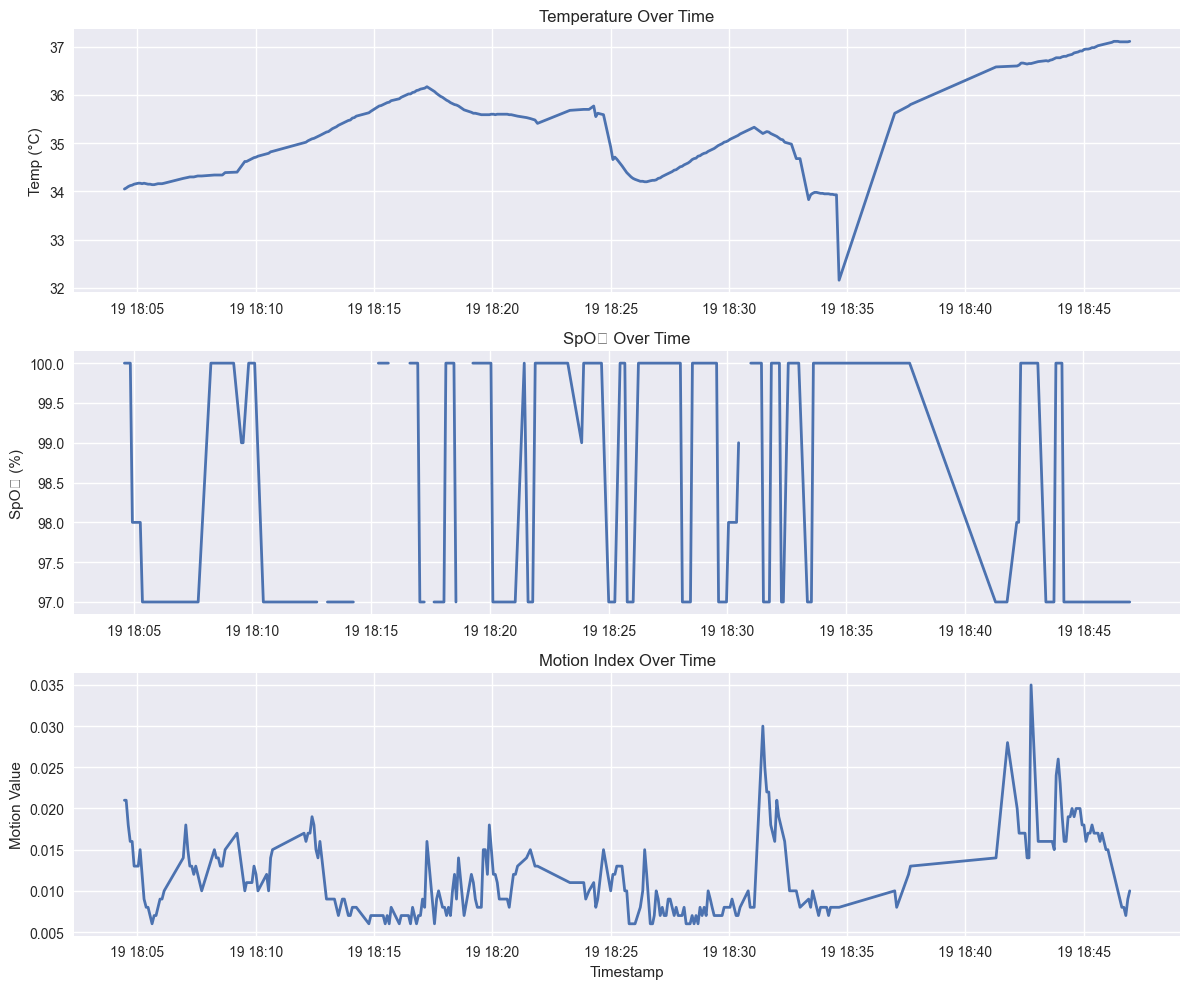

In [3]:
plt.figure(figsize=(12, 10))

# Temperature
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['tempC'], linewidth=2)
plt.title("Temperature Over Time")
plt.ylabel("Temp (°C)")
plt.grid(True)

# SpO2
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['spo2'], linewidth=2)
plt.title("SpO₂ Over Time")
plt.ylabel("SpO₂ (%)")
plt.grid(True)

# Motion
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['motion'], linewidth=2)
plt.title("Motion Index Over Time")
plt.ylabel("Motion Value")
plt.xlabel("Timestamp")
plt.grid(True)

plt.tight_layout()
plt.show()


In [4]:
def cv(series):
    return series.std() / series.mean()

cv_temp = cv(df['tempC'])
cv_spo2 = cv(df['spo2'].dropna())
cv_motion = cv(df['motion'])

print("Coefficient of Variation (CV):")
print(f"Temperature CV: {cv_temp:.4f}")
print(f"SpO₂ CV:        {cv_spo2:.4f}")
print(f"Motion CV:      {cv_motion:.4f}")


Coefficient of Variation (CV):
Temperature CV: 0.0272
SpO₂ CV:        0.0149
Motion CV:      0.4168


In [5]:
summary = df[['tempC', 'spo2', 'motion',
              'acc_x', 'acc_y', 'acc_z',
              'gyr_x', 'gyr_y', 'gyr_z']].describe()

summary


,tempC,spo2,motion,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z
count,299.000000,282.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000
mean,35.311773,98.421986,0.011485,0.170425,0.90894,0.236642,-1.217796,0.376067,-0.026087
std,0.961290,1.462197,0.004787,0.149305,0.05820,0.210155,3.870043,3.881934,4.218701
min,32.160000,97.000000,0.006000,-0.220000,0.71800,-0.359000,-17.076000,-22.229000,-34.740000
25%,34.425000,97.000000,0.008000,0.073500,0.86050,0.040000,-2.862500,-0.901000,-1.481000
50%,35.230000,98.000000,0.010000,0.188000,0.89600,0.352000,-1.305000,0.733000,-0.015000
75%,35.860000,100.000000,0.015000,0.299500,0.96800,0.396000,0.213500,2.027000,1.496000
max,37.110000,100.000000,0.035000,0.408000,1.01600,0.494000,19.977000,20.206000,18.969000


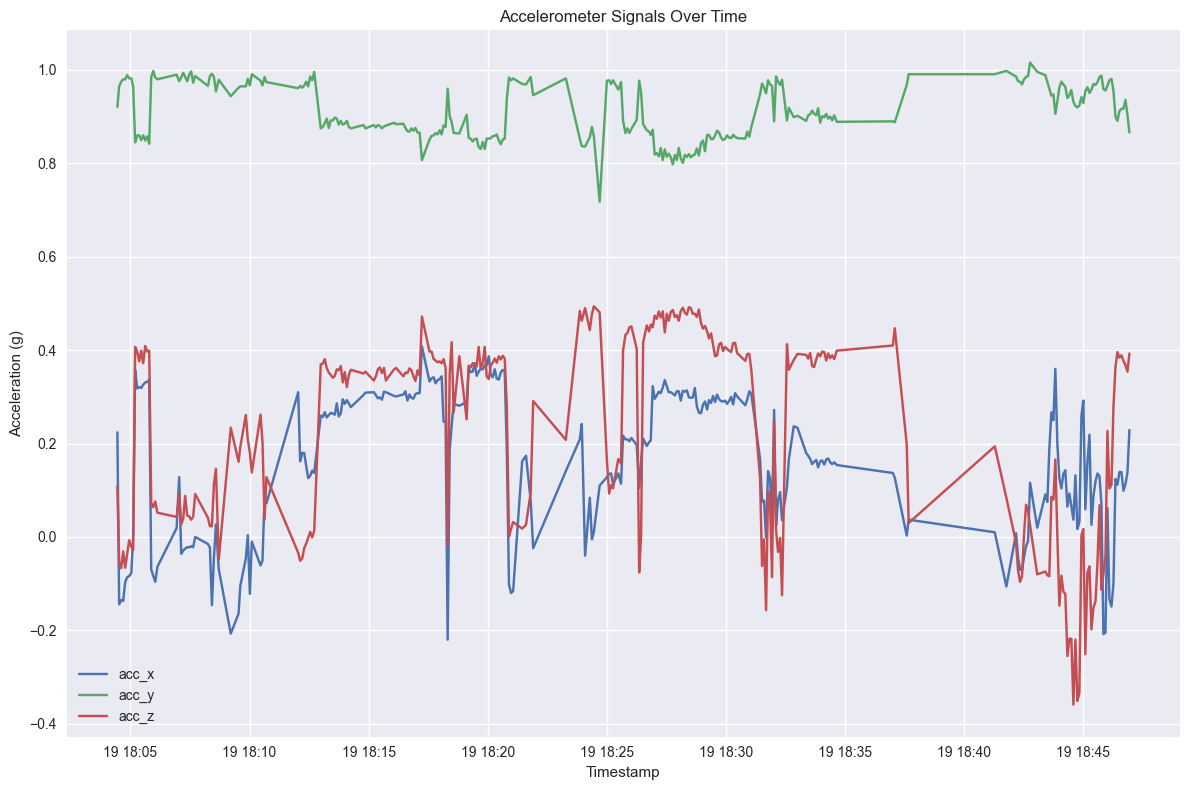

In [6]:
plt.figure(figsize=(12, 8))

plt.plot(df['timestamp'], df['acc_x'], label="acc_x")
plt.plot(df['timestamp'], df['acc_y'], label="acc_y")
plt.plot(df['timestamp'], df['acc_z'], label="acc_z")

plt.title("Accelerometer Signals Over Time")
plt.ylabel("Acceleration (g)")
plt.xlabel("Timestamp")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


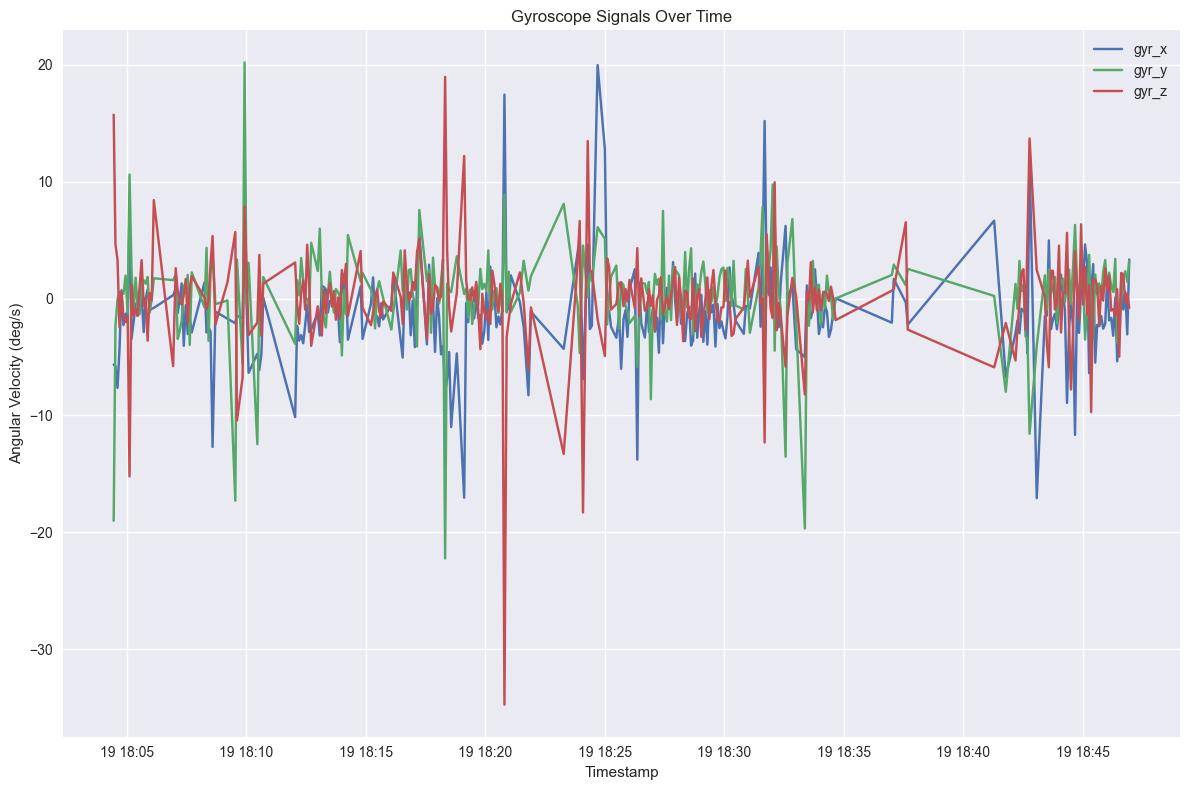

In [7]:
plt.figure(figsize=(12, 8))

plt.plot(df['timestamp'], df['gyr_x'], label="gyr_x")
plt.plot(df['timestamp'], df['gyr_y'], label="gyr_y")
plt.plot(df['timestamp'], df['gyr_z'], label="gyr_z")

plt.title("Gyroscope Signals Over Time")
plt.ylabel("Angular Velocity (deg/s)")
plt.xlabel("Timestamp")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
